In [36]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy import stats


In [37]:
metastatic_data_csv = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_clinicaltrial_data.csv"
drug_data_csv = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_mouse_drug_data.csv"

metastatic_data = pd.read_csv(metastatic_data_csv)
drug_data = pd.read_csv(drug_data_csv)

In [121]:
combined_data = pd.merge(metastatic_data, drug_data, how="outer", on="Mouse ID")

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [122]:
grouped_drug_data = combined_data.groupby(["Drug", "Timepoint"])

drugAvgs = grouped_drug_data.mean()
drugAvgs.head(10)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190

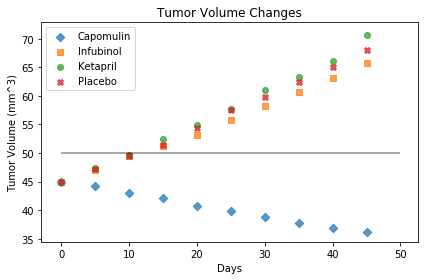

In [123]:
drug_list = ["Capomilin", "Infubinol", "Ketapril", "Placebo"]
timepoints = np.arange(0, 50, 5)

tumor_volume = drugAvgs["Tumor Volume (mm3)"]
capo_tumor_volume = tumor_volume.loc["Capomulin", :]
infu_tumor_volume = tumor_volume.loc["Infubinol", :]
keta_tumor_volume = tumor_volume.loc["Ketapril", :]
plac_tumor_volume = tumor_volume.loc["Placebo", :]

capo_tumor_vol_plot = plt.scatter(timepoints, capo_tumor_volume, marker = "D", label = "Capomulin", alpha = .75)
infu_tumor_vol_plot = plt.scatter(timepoints, infu_tumor_volume, marker = "s", label = "Infubinol", alpha = .75)
keta_tumor_vol_plot = plt.scatter(timepoints, keta_tumor_volume, marker = "o", label = "Ketapril", alpha = .75)
plac_tumor_vol_plot = plt.scatter(timepoints, plac_tumor_volume, marker = "X", label = "Placebo", alpha = .75)

plt.hlines(50, 0, 50, alpha=0.45)
plt.title("Tumor Volume Changes")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


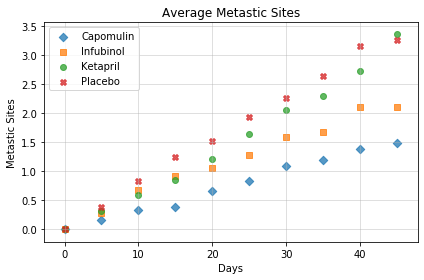

In [124]:
metastatic_avg = drugAvgs["Metastatic Sites"]

capo_metastatic_avg = metastatic_avg.loc["Capomulin", :]
infu_metastatic_avg = metastatic_avg.loc["Infubinol", :]
keta_metastatic_avg = metastatic_avg.loc["Ketapril", :]
plac_metastatic_avg = metastatic_avg.loc["Placebo", :]

capo_metastatic_plot = plt.scatter(timepoints, capo_metastaticAvg, marker = "D", label = "Capomulin", alpha = .75)
infu_metastatic_plot = plt.scatter(timepoints, infu_metastaticAvg, marker = "s", label = "Infubinol", alpha = .75)
keta_metastatic_plot = plt.scatter(timepoints, keta_metastaticAvg, marker = "o", label = "Ketapril", alpha = .75)
plac_metastatic_plot = plt.scatter(timepoints, plac_metastaticAvg, marker = "X", label = "Placebo", alpha = .75)

plt.title("Average Metastic Sites")
plt.xlabel("Days")
plt.ylabel("Metastic Sites")
plt.legend(loc="best")
plt.grid(alpha = .5)
plt.tight_layout()
plt.show()

In [75]:
drug_counts = grouped_drug_data.count()
mouse_counts = drug_counts["Mouse ID"]
#list mouse count by drug and timepoint
mouse_counts = pd.DataFrame(mouseCounts)
mouse_counts = mouse_counts.rename(columns={"Mouse ID": "Mouse Count"})
mouseCounts.head(15)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18

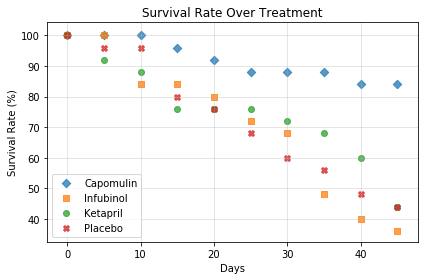

In [77]:
capo_mouse_counts = mouse_counts.loc["Capomulin", :]
infu_mouse_counts = mouse_counts.loc["Infubinol", :]
keta_mouse_counts = mouse_counts.loc["Ketapril", :]
plac_mouse_counts = mouse_counts.loc["Placebo", :]

capo_survival_perc = capo_mouse_counts / capo_mouse_counts.iloc[0, 0] * 100
infu_survival_perc = infu_mouse_counts / infu_mouse_counts.iloc[0, 0] * 100
keta_survival_perc = keta_mouse_counts / keta_mouse_counts.iloc[0, 0] * 100
plac_survival_perc = plac_mouse_counts / plac_mouse_counts.iloc[0, 0] * 100

#plot each drug's mouse count over time
capo_tumor_vol_plot = plt.scatter(timepoints, capo_survival_perc, marker = "D", label = "Capomulin", alpha = .75)
infu_tumor_vol_plot = plt.scatter(timepoints, infu_survival_perc, marker = "s", label = "Infubinol", alpha = .75)
keta_tumor_vol_plot = plt.scatter(timepoints, keta_survival_perc, marker = "o", label = "Ketapril", alpha = .75)
plac_tumor_vol_plot = plt.scatter(timepoints, plac_survival_perc, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Survival Rate Over Treatment")
plt.xlabel("Days")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.grid(alpha = .4)
plt.tight_layout()
plt.show()

In [80]:
capo_tumor_perc_change = (capo_tumor_volume[9] / capo_tumor_volume[0] * 100) - 100
infu_tumor_perc_change = (infu_tumor_volume[9] / infu_tumor_volume[0] * 100) - 100
keta_tumor_perc_change = (keta_tumor_volume[9] / keta_tumor_volume[0] * 100) - 100
plac_tumor_perc_change = (plac_tumor_volume[9] / plac_tumor_volume[0] * 100) - 100

#list tumor % changes
tumor_perc_list = [capo_tumor_perc_change, infu_tumor_perc_change, keta_tumor_perc_change, plac_tumor_perc_change]

#create table with drug and tumor % change
tumor_perc_table = pd.DataFrame({"Drug": drug_list, "Tumor Percent Change": tumor_perc_list})
tumor_perc_table

,Drug,Tumor Percent Change
0,Capomilin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


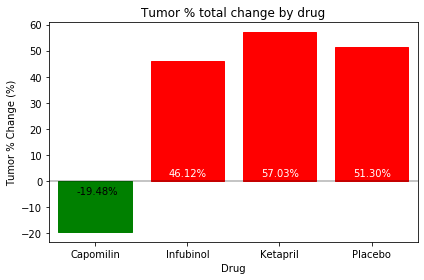

In [95]:
tumor_chart = plt.bar(tumor_perc_table["Drug"],tumor_perc_table["Tumor Percent Change"])

for i in range(len(drug_list)):
    if tumor_perc_list[i] < 0:
        tumor_chart[i].set_color("green")
        perc_text = format(tumor_perc_list[i] / 100, ".2%")
        plt.text(-.2 + i, -5, perc_text)
    else:
        tumor_chart[i].set_color("red")
        perc_text = format(tumor_perc_list[i] / 100, ".2%")
        plt.text(-.2 + i, 2, perc_text, color = "w")
        
plt.title("Tumor % total change by drug")
plt.xlabel("Drug")
plt.ylabel("Tumor % Change (%)")
plt.hlines(0, -.5, 3.5, alpha=0.3)
plt.xlim(-.5, 3.5)
plt.tight_layout()
plt.show()

        
        

In [ ]:
#Observations
# 1 All the drugs have changing tendence on tumor volume, the drug 
 # Capomilin was the most positive change in the 45 days tests.
# 2 As well in the survive plot we can see that Capomilin had the 
 # highest survival rate with almost twice as much pased the 45 days.
# 3 Capomilin was the only drug with positve changes in all tests.